# COMP-551 Applied Machine Learning
# Assignment #01
## Author: Antonios Valkanas

### Question 1: Sampling

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
# This is the sample generator which follows the 
# required probability distribution. See the report for
# explanation of the algorithm in pseudocode. The method
# returns a 4 element array with the frequency of the events.
def generate_student_days(num_days):
	random_variable = np.random.uniform(0,1,num_days)
	event_log = np.zeros(4,dtype=int)
	for element in random_variable:
		if element <= 0.2:
			event_log[0] += 1
			# Case movies
		elif element <= 0.6:
			event_log[1] += 1
			# Case COMP-551
		elif element <= 0.7:
			event_log[2] += 1
			# Case playing
		else:
			event_log[3] += 1
			# Case studying
	print("Breakdown of student activities for", num_days ,"days.")
	print("Movies for", event_log[0], "days.")
	print("COMP-551 for", event_log[1], "days.")
	print("Playing for", event_log[2], "days.")
	print("Studying for", event_log[3], "days.")
	return event_log

# This method takes as input the samples of the distribution from
# the function defined above and plots the results.
def plot_bar(event_log):
	# this plots the bar graph
	label = ['Movies', 'COMP-551', 'Playing', 'Studying']
	index = np.arange(len(label))
	plt.bar(index, event_log)
	plt.xlabel('Activity', fontsize = 8)
	plt.ylabel('No of Days', fontsize = 8)
	plt.xticks(index, label, fontsize = 8, rotation = 30)
	plt.title('Daily Activity Histogram for {} days.'.format(sum(event_log)))
	plt.show()

Breakdown of student activities for 100 days.
Movies for 18 days.
COMP-551 for 37 days.
Playing for 15 days.
Studying for 30 days.


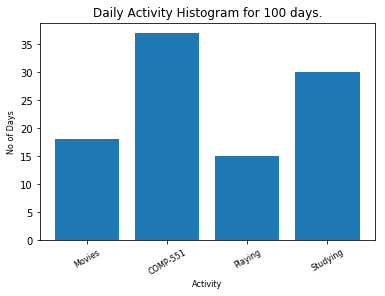

In [3]:
# Plot the student's activities for 100 days.
day_count = 100
log = generate_student_days(day_count)
plot_bar(log)

Breakdown of student activities for 1000 days.
Movies for 179 days.
COMP-551 for 424 days.
Playing for 106 days.
Studying for 291 days.


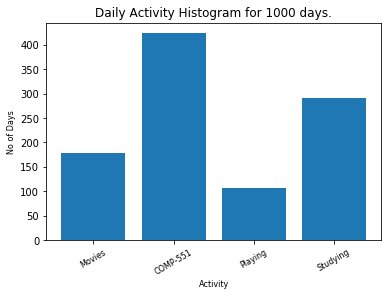

In [4]:
# Plot the student's activities for 1000 days.
day_count = 1000
log = generate_student_days(day_count)
plot_bar(log)

### Question 2: Model Selection

In [5]:
# This function reads the input data files from memory and 
# sorts the corresponding (x,y) pairs based on the order of ascending x.
# The ordering has to be done so that the plot displays correctly.
def read_data(filename):
	my_data = np.genfromtxt(filename, delimiter = ',')
	# assign first column to input variable and second to target
	x_train, Y_train = my_data[:,0], my_data[:,1]
	# we need to order the array wrt x and keep each x paired with the corresponding Y
	my_sorted_data = sorted(zip(x_train, Y_train), key = operator.itemgetter(0))
	sorted_x_train, sorted_Y_train = zip(*my_sorted_data)
	return sorted_x_train, sorted_Y_train

In [6]:
# Mean Squared Error (MSE) calculation functions.

# Basic MSE calculator used for simple regression.
def MSE(Y,Y_pred):
    return sum([(Y_pred[i] - Y[i]) ** 2 for i in range(len(Y))])/len(Y)

# MSE calculator used for optimizing the λ value by
# scanning through thousands of different values and picking
# the least MSE. This function is used to get all the MSEs in a list.
def L2_get_MSE(x_vector,Y_vector, weight_list):
	MSE_list = []
	for weight_vector in weight_list:
		MSE_list.append(MSE(Y_vector,pred_Y(x_vector, weight_vector)))
	return MSE_list


In [7]:
# Simple Regression functions

# This method generates the weight vector for the regression
# using the closed form analytical expression:
# w = (φ^Τ * φ)^-1 * φ^Τ * y
# where φ is the polynomial basis created from x
# for our problem degree = 20.
def get_weight_vector(x_vector, Y_vector, degree):
	phi = np.zeros((degree+1)*len(x_vector)).reshape(len(x_vector), (degree+1))
	for i in range (len(x_vector)): 
		for j in range (degree+1): # plus one because we start from x^0
			phi[i][j] = x_vector[i]**j
	weight_vector = np.linalg.inv((phi.T).dot(phi)).dot(phi.T).dot(Y_vector)
	return weight_vector

# This function uses the weight vector found above and multiplies
# it by the input vector to generate the estimated Y.
# Y(hat) = w^T * x
def pred_Y(x, weight_vector):
	y = np.zeros(len(x))
	for i in range(len(x)):
		for j in range (len(weight_vector)):
			y[i] += weight_vector[j] * x[i] ** j
	return y.T

In [8]:
# Ridge Regression functions

# This method generates the weight vector for the regression
# using the closed form analytical expression:
# w = (x^T * x + λI)^-1 * x^T * y
# where φ is the polynomial basis created from x
# for our problem degree = 20.
def L2_get_weight_vector(x_vector, Y_vector, degree, lambda_value):
	return  np.linalg.inv(x_vector.T.dot(x_vector) + lambda_value*np.identity(degree + 1)).dot(x_vector.T).dot(Y_vector)

# This method uses ridge regression with various coefficient values to optimize λ
# such that the mean squared error is minimized.
def L2_regularization(x_vector, Y_vector, degree):
	weight_list = []
	lambda_value_list = []
	phi = np.zeros((degree+1)*len(x_vector)).reshape(len(x_vector), (degree+1))
	for i in range (len(x_vector)): # plus one because we start from zero
		for j in range (degree+1):
			phi[i][j] = x_vector[i]**j
	lambda_value = 1e-4
	while lambda_value <= 1:
		lambda_value_list.append(lambda_value)
		weight_vector = L2_get_weight_vector(phi,Y_vector, degree, lambda_value)
		weight_list.append(weight_vector)
		lambda_value += 1e-4
	return lambda_value_list, weight_list

In [9]:
# Fitting methods

# Fits the dataset using simple regression. Plots the result.
def plot_fit(x_train, Y_train, x_validation, Y_validation, weight, degree):
	plt.title('Regression Fit without Regularization for Polynomial of Degree {}'.format(degree))
	plt.xlabel('x values')
	plt.ylabel('Y values')
	plt.plot(x_train, Y_train, 'bo', label = "Training Set")
	plt.plot(x_validation, Y_validation, 'ro', label = "Validation Set")
	plt.plot(x_validation, pred_Y(x_validation, weight))
	plt.legend(loc = 'upper left')
	plt.axis([-1.1,1.1,-20, 50])
	plt.show()

# Optimizes the λ parameter and plots the MSEs for 0<λ<1.
def plot_L2_MSE(x_train, Y_train, x_validation, Y_validation, weight, degree):
	plt.title("Mean Squared Error vs. Regularization Parameter Lambda")
	plt.xlabel('Lambda')
	plt.ylabel('MSE')
	lambda_value_list, weight_list = L2_regularization(x_train, Y_train, degree)
	lambdas = np.asarray(lambda_value_list)
	weights = np.asarray(weight_list)
	MSE_train_list = L2_get_MSE(x_train, Y_train, weights)
	MSE_validation_list = L2_get_MSE(x_validation, Y_validation, weights)
	plt.plot(lambdas, MSE_train_list, 'b-', label = 'Training')
	plt.plot(lambdas, MSE_validation_list, 'r-', label = 'Validation')
	plt.legend(loc = 'upper right')
	plt.show()

# Fits the test data using ridge regression with optimal parameters.
# Plots the result.
def plot_test_fit(x_train, Y_train, x_test, Y_test, degree):#best lambda is 0.0202
	plt.title('Fit of test Data')
	plt.xlabel('x values')
	plt.ylabel('Y values')
	lambda_value_list, weight_list = L2_regularization(x_train, Y_train, degree)
	lambdas = np.asarray(lambda_value_list)
	weights = np.asarray(weight_list)
	MSE_train_list = L2_get_MSE(x_train, Y_train, weights)
	MSE_validation_list = L2_get_MSE(x_validation, Y_validation, weights)
	print('Optimal Lambda =', lambdas[MSE_validation_list.index(min(MSE_validation_list))], 'with MSE = ', min(MSE_validation_list))
	plt.plot(x_test, Y_test, 'go', label = 'Test')
	plt.plot(x_test, pred_Y(x_test, weights[MSE_validation_list.index(min(MSE_validation_list))]))
	plt.legend(loc = 'upper left')
	plt.show()

In [10]:
# First read in the dataset and set the degree of the regression

DEGREE = 20
x_train, Y_train = read_data("Dataset_1_train.csv")
x_validation, Y_validation = read_data("Dataset_1_valid.csv")
x_test, Y_test = read_data("Dataset_1_test.csv")

In [11]:
# Now get the weights for the simple regression and get
# the MSE of the model.

weight = get_weight_vector(x_train, Y_train, DEGREE)
print("Training MSE:", MSE(Y_train, pred_Y(x_train, weight)))
print("Validation MSE:", MSE(Y_validation, pred_Y(x_validation,weight)))


Training MSE: 6.474757468571469
Validation MSE: 1422.204539670829


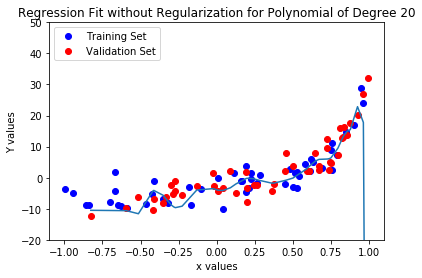

In [12]:
# Plot the resulting curve of best fit from the model.
plot_fit(x_train, Y_train, x_validation, Y_validation, weight, DEGREE)
# Note that the first few blue data points are ignored because the curve
# shown is for the validation dataset (red points).

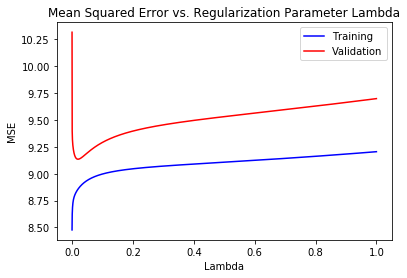

Optimal Lambda = 0.019699999999999936 with MSE =  9.135083473007517


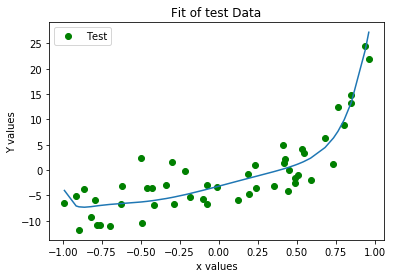

In [13]:
# Optimize λ, then plot the curve of best for the test using L2 regularization.
plot_L2_MSE(x_train, Y_train, x_validation, Y_validation, weight, DEGREE)
plot_test_fit(x_train, Y_train, x_test, Y_test, DEGREE)

###  Question 3: Gradient Descent for Regression

In [14]:
# First set up the weight array (containing the coefficients a,b of ax+b)
# and set the learning rate ALPHA to 1e-6. Also, we input the data.
ALPHA = 1e-6
weights = np.zeros(2,dtype=float)
x_train, Y_train = read_data("Dataset_2_train.csv")
x_valid, Y_valid = read_data("Dataset_2_valid.csv")

In [15]:
# Define the linear regression output function
def predict_Y(x):
	return weights[0] + weights[1] * x

In [16]:
# Stochastic Gradient Descent functions

# Defines an SGD step, w = w - α * (error)
def sgd(x, y, weights, learning_rate):
	weights[0] -= learning_rate*(predict_Y(x) - y)
	weights[1] -= learning_rate*(predict_Y(x) - y)*x

# Takes n SGD steps where n is the number of data points.
def sgd_optimizer(x,y, learning_rate):
	for i in range(len(x)):
		sgd(x[i], y[i], weights, learning_rate)

In [40]:
# Functions used to get the MSE error and plot it.

# Gets the MSE for each step an appends it to a list which
# is returned as an array to allow easier manipulation.
def sgd_mse_list(x,y, learning_rate):
	mse_list = []
	x_list = []
	y_list = []
	for i in range(len(np.array(x))):
		x_list.append(x[i])
		y_list.append(y[i])
		sgd(x[i], y[i], weights, learning_rate)
		estimated_Y = [predict_Y(j) for j in x_list]
		mse_list.append(MSE(y_list, estimated_Y))
		mse_array = np.asarray(mse_list)
	return np.mean(mse_array)

# Log graph of error to improve visualization (especially for low ALPHA)
# since a low learning rate makes convergence very slow.
def mse_log_graph(x_train,Y_train,x_valid,Y_valid,learning_rate,epochs):
	mse_list_val = []
	mse_list_train = []
	plt.figure(1)
	for i in range(epochs + 1):
		sgd_optimizer(x_train,Y_train, learning_rate)
		mse_list_val.append(np.log10(sgd_mse_list(x_valid,Y_valid, ALPHA)))
	plt.plot(mse_list_val)
	plt.title('Validation Logarithm of the Mean Squared Error vs. number of Epochs')
	plt.xlabel('Epochs')
	plt.ylabel('Log10(MSE)')
	plt.show()
	plt.figure(2)
	for i in range(epochs + 1):
		sgd_optimizer(x_train,Y_train, learning_rate)
		mse_list_train.append(np.log10(sgd_mse_list(x_valid,Y_valid, ALPHA)))
	plt.plot(mse_list_train)
	plt.title('Training Logarithm of the Mean Squared Error vs. number of Epochs')
	plt.xlabel('Epochs')
	plt.ylabel('Log10(MSE)')
	plt.show()

# Basic MSE plot to visualize how it reduces as we train.
def mse_graph(x_train,Y_train,x_valid,Y_valid,learning_rate,epochs):
	mse_list_val = []
	mse_list_train = []
	plt.figure(1)
	for i in range(epochs + 1):
		sgd_optimizer(x_train,Y_train, learning_rate)
		mse_list_val.append(sgd_mse_list(x_valid,Y_valid, ALPHA))
	plt.plot(mse_list_val)
	plt.title('Validation Mean Squared Error vs. number of Epochs')
	plt.xlabel('Epochs')
	plt.ylabel('MSE')
	plt.show()
	plt.figure(2)
	for i in range(epochs + 1):
		sgd_optimizer(x_train,Y_train, learning_rate)
		mse_list_train.append(sgd_mse_list(x_train,Y_train, ALPHA))
	print("MSE reached after",epochs,"epochs is:",mse_list_val[-1])
	plt.plot(mse_list_train)
	plt.title('Training Mean Squared Error vs. number of Epochs')
	plt.xlabel('Epochs')
	plt.ylabel('MSE')
	plt.show()
    
# Visualization of learning over epochs.
def fit_visualization(x_valid, Y_valid, learning_rate, epochs):
	weights = [0.0, 0.0]
	fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
	fig.suptitle("Validation Fit as the Number of Epochs Increases", fontsize=18)
	pred_list_0 = []
	pred_list_1 = []
	pred_list_2 = []
	pred_list_3 = []
	pred_list_4 = []
	pred_list_5 = []
	#mse_list_val = []

	for i in range(epochs + 1):
		sgd_optimizer(x_train,Y_train, learning_rate)
		#mse_list_val.append(sgd_mse_list(x_valid,Y_valid, ALPHA))
		if i == 0:
			for i in range(len(x_valid)):
				pred_list_0.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,1)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_0)
			plt.title('Fit after Epoch 1', fontsize = 9)
		if i == 2:
			for i in range(len(x_valid)):
				pred_list_1.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,2)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_1)
			plt.title('Fit after Epoch 2', fontsize = 9)
		if i == 4:
			for i in range(len(x_valid)):
				pred_list_2.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,3)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_2)
			plt.title('Fit after Epoch 4', fontsize = 9)
		if i == 5:
			for i in range(len(x_valid)):
				pred_list_3.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,4)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_3)
			plt.title('Fit after Epoch 5', fontsize = 9)
		if i == 8:
			for i in range(len(x_valid)):
				pred_list_4.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,5)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_4)
			plt.title('Fit after Epoch 8', fontsize = 9)
		if i == 35:
			for i in range(len(x_valid)):
				pred_list_5.append(predict_Y(x_valid[i]))
			plt.subplot(2,3,6)
			plt.plot(x_valid,Y_valid, 'ro')
			plt.plot(x_valid, pred_list_5)
			plt.title('Fit after Epoch 35', fontsize = 9)
	plt.subplots_adjust(hspace=0.3, wspace = 0.25)
	plt.show()


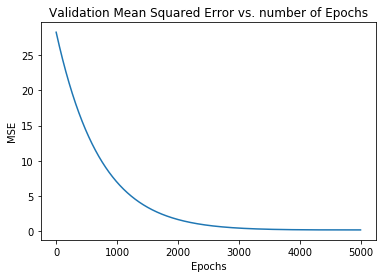

MSE reached after 5000 epochs is: 0.16192971243106574


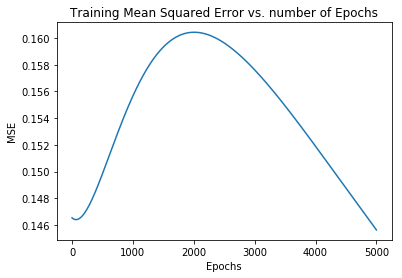

In [18]:
# 3.1 Visualization of SGD and MSE at every epoch
# For clarity there is a regular graph, and a log graph.
print("With the learning rate equal to 1e-6 we get the following MSE")
mse_graph(x_train,Y_train,x_valid,Y_valid,ALPHA,5000)

When the learning rate is 1e-05 we get the following MSE.


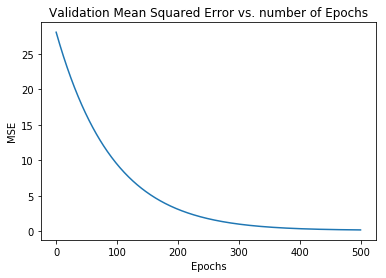

MSE reached after 500 epochs is: 0.19502966462619503


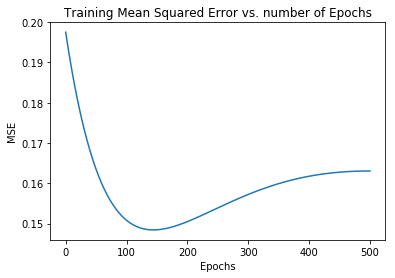

When the learning rate is 0.0001 we get the following MSE.


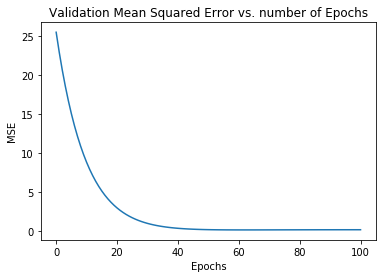

MSE reached after 100 epochs is: 0.19062630765389207


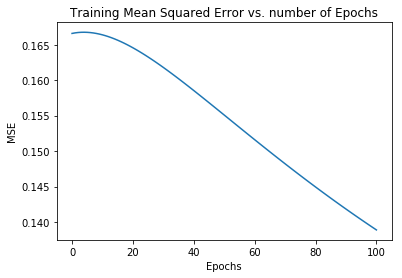

When the learning rate is 0.001 we get the following MSE.


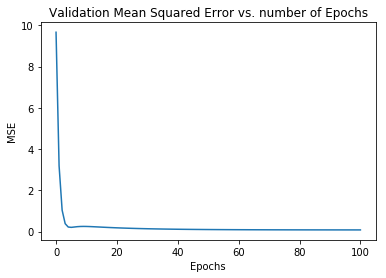

MSE reached after 100 epochs is: 0.078478715848279


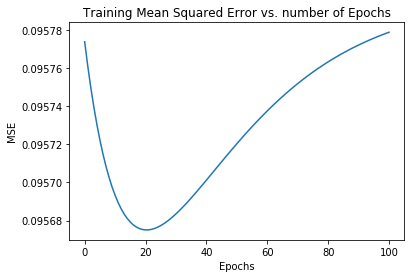

When the learning rate is 0.01 we get the following MSE.


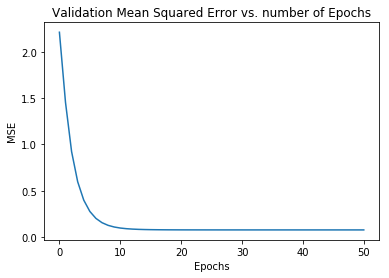

MSE reached after 50 epochs is: 0.07562264890601748


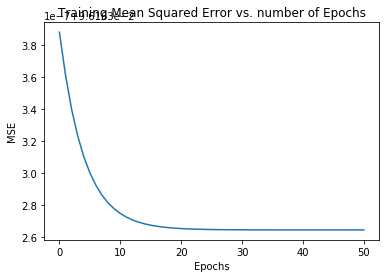

When the learning rate is 0.1 we get the following MSE.


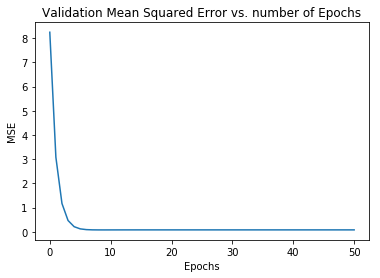

MSE reached after 50 epochs is: 0.07872049707200897


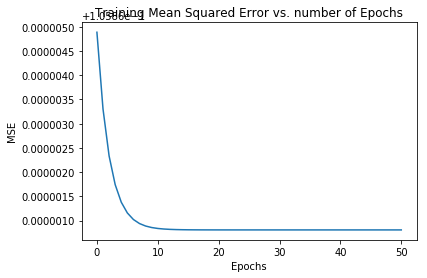

When the learning rate is 0.99 we get the following MSE.


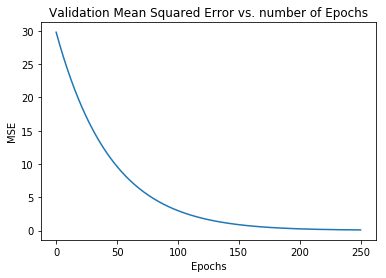

MSE reached after 250 epochs is: 0.10649082882152643


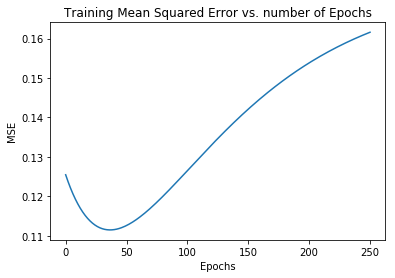

In [34]:
# 3.2 Vary ALPHA to optimize the learning rate 

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 1e-5, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,1e-5,500)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 1e-4, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,1e-4,100)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 1e-3, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,1e-3,100)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 1e-2, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,1e-2,50)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 1e-1, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,1e-1,50)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
print("When the learning rate is", 0.99, "we get the following MSE.")
mse_graph(x_train,Y_train,x_valid,Y_valid,0.99,250)

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.


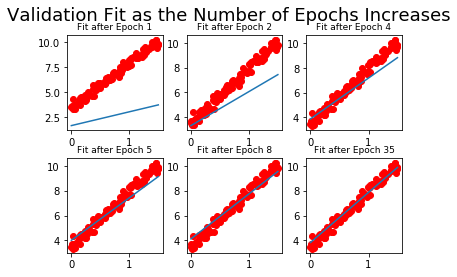

In [41]:
# 3.3
# From the plots above we observe that the best trade-off between
# convergence speed and validation MSE is found for α = 0.001
# so let's visualize the fit with it.

weights = np.zeros(2,dtype=float) # Reset the weights so we can retrain.
fit_visualization(x_valid, Y_valid, 1e-3, 40)

### Question 4: Real Life Dataset

In [47]:
# First we need to read in the data.

na_values = ['?'] # Filler for NaN csv cells

# drop columns 1 to 5 because txt file explains that
# they provide information unusable for predictive purposes
# and only for reference purposes

# Open the communities name folder and search for section headers
# clean them up and remove attribute and type then append to header list
col_index = []
with open("communities_names.txt") as f:
    for line in f:
        line = line.strip()
        if "@attribute" in line:
            header = line.replace("@attribute", "")
            header = header.replace("numeric", "")
            header = header.replace("string", "")
            header = header.strip()
            col_index.append(header)
            
# drop columns 1 to 5 because txt file explains that
# they provide information unuable for predictive purposes
# and only for reference purposes
def read_data(filename):
	df = pd.read_csv(filename, names=col_index, na_values = '?')
	print (df.head())
	df.drop(df.columns[[0,1,2,3,4]], axis = 1, inplace=True)
	print(df.shape)
	return df

In [61]:
# 4.1 Replacing the empty entries.

# Replace NaN with mean
def replace_nan_mean(dataframe):
	dataframe.fillna(dataframe.mean(axis = 1), inplace = True)
	dataframe.to_csv("Datasets/communities_data_mean.csv")
    
# Replace NaN with median (to deal with outliers better)
def replace_nan_median(dataframe):
	dataframe.fillna(dataframe.median(axis = 1), inplace = True)
	dataframe.to_csv("Datasets/communities_data_median.csv")

In [62]:
# 4.2 Data Split

# Used to split in 5 train and test files.
def k_fold_split(dataset, k):
    for index in range(1, k+1):
        mask = np.random.rand(len(dataset)) < 0.8
        train = dataset[mask]
        test = dataset[~mask]
        train.to_csv('Datasets/CandC-train{}.csv'.format(index))
        test.to_csv('Datasets/CandC-test{}.csv'.format(index))

# Randombly splits data to 80-20 proportions.
def split_data(train_data):
    np.random.shuffle(train_data)
    slice = int(len(train_data) * .80)
    return (train_data[:slice],train_data[slice:])

In [65]:
# Perform simple regression and save the trained weights to a file.
def get_weights(x,Y):
	return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(Y)

def predict_Y(x, weight):
	return x.dot(weight)

# Performs the regression and calculates the average MSe over the 5 files.
def average_mse():
	average_mse = 0
	weights = []
	for i in range (1,6):
		train_data = pd.read_csv('Datasets/CandC-train{}.csv'.format(i))
		test_data = pd.read_csv('Datasets/CandC-test{}.csv'.format(i))
		train_matrix = np.array(train_data.as_matrix())
		test_matrix = np.array(test_data.as_matrix())
		x_train = train_matrix[:,:-1]
		Y_train = train_matrix[:,-1]
		x_test = test_matrix[:,:-1]
		Y_test = test_matrix[:,-1]
		weight = get_weights(x_train,Y_train)
		weights.append(weight)
		mse = MSE(Y_test, predict_Y(x_test, weight))
		average_mse += mse
		print ("MSE {}: {}".format(i, mse))

	average_mse /= 5
	print("Average MSE:",average_mse)
	with open("Assignment1_260672034_4_2.txt",'w+') as w:
		for value in weights:
			w.write(str(value)+'\n\n')

In [67]:
# 4.2

# Similar to question 2. Analytical L2 Reg. weight formula.
def ridge_regression_weights(x,Y,lam):
	return np.linalg.inv(x.T.dot(x) + lam*np.identity(len(x[1]))).dot(x.T).dot(Y)

# Gets the MSE for the lambda value given.
def ridge_mse(lam):
	average_mse = 0
	weights = []
	for i in range (1,6):
		train_data = pd.read_csv('Datasets/CandC-train{}.csv'.format(i))
		test_data = pd.read_csv('Datasets/CandC-test{}.csv'.format(i))
		train_matrix = np.array(train_data.as_matrix())
		test_matrix = np.array(test_data.as_matrix())
		x_train = train_matrix[:,:-1]
		Y_train = train_matrix[:,-1]
		x_test = test_matrix[:,:-1]
		Y_test = test_matrix[:,-1]
		weight = ridge_regression_weights(x_train,Y_train,lam)
		weights.append(weight)
		mse = MSE(Y_test, predict_Y(x_test, weight))
		average_mse += mse
	average_mse /= 5
	return average_mse

# Test various lambda values to optimize L2 Reg.
def optimize_lambda():
	lam = 0
	optimal_lambda = 0
	least_mse = 100
	increment = 1e-1
	mse_list = []
	stop = 10
	while lam <= 10:
		mse_list.append(ridge_mse(lam))
		if mse_list[-1] < least_mse:
			least_mse = mse_list[-1]
			optimal_lambda = lam
		lam += increment
	plt.plot(np.linspace(0,stop,int(stop/increment+1)), mse_list, label = 'Mean Squared Error')
	plt.plot(optimal_lambda, least_mse, 'rx', label = 'Minimum MSE')
	plt.legend(loc = 'upper right')
	plt.xlabel('lambda')
	plt.ylabel('MSE')
	plt.title('Test MSE for varying lambda')
	print("Best fit achieved for lamda = {} with MSE = {}".format(optimal_lambda,least_mse))
	plt.show()


In [68]:
# 4.3 

# Drops the selected amount of features based on
# what feature has the smallest magnitude in its corresponding weight.
def feature_selection(x,Y,lam,remove_num):
	if remove_num >= len(x):
		return np.zeros(len(x))
	weight = ridge_regression_weights(x,Y,lam)
	#weight_list = list(weight)
	for i in range (remove_num):
		minimum_weight = min(weight, key = abs)
		#minimum_weight = min(weight_list, key = abs)
		#min_index = weight_list.index(minimum_weight)
		min_index = np.where(weight==minimum_weight)
		weight[min_index] = 0
	#print("Length of weight is:",len(weight))
	return weight

# Performs ridge regression with the selected features
def feature_selection_ridge_mse(lam, remove_num):
	average_mse = 0
	for i in range (1,6):
		train_data = pd.read_csv('Datasets/CandC-train{}.csv'.format(i))
		test_data = pd.read_csv('Datasets/CandC-test{}.csv'.format(i))
		train_matrix = np.array(train_data.as_matrix())
		test_matrix = np.array(test_data.as_matrix())
		x_train = train_matrix[:,:-1]
		Y_train = train_matrix[:,-1]
		x_test = test_matrix[:,:-1]
		Y_test = test_matrix[:,-1]
		weight = feature_selection(x_train,Y_train,lam,remove_num)
		mse = MSE(Y_test, predict_Y(x_test, weight))
		average_mse += mse
	average_mse /= 5
	return average_mse	

# Optimizes the lambda for the new Ridge Reg.
def optimize_lambda_with_feature_selection(remove_num):
	lam = 0
	optimal_lambda = 0
	least_mse = 100
	increment = 1e-1
	mse_list = []
	stop = 10
	while lam <= 10:
		mse_list.append(feature_selection_ridge_mse(lam,remove_num))
		if mse_list[-1] < least_mse:
			least_mse = mse_list[-1]
			optimal_lambda = lam
		lam += increment
	plt.plot(np.linspace(0,stop,int(stop/increment+1)), mse_list, label = 'Mean Squared Error')
	plt.plot(optimal_lambda, least_mse, 'rx', label = 'Minimum MSE')
	plt.legend(loc = 'upper right')
	plt.xlabel('lambda')
	plt.ylabel('MSE')
	plt.title('Test MSE for varying lambda with {} dropped features'.format(remove_num))
	print("Best fit achieved for lamda = {} with MSE = {}".format(optimal_lambda,least_mse))
	plt.show()


In [73]:
# 4.1
df = read_data('communities_data.csv')
replace_nan_median(df)

   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45     

In [74]:
# 4.2
average_mse()

C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


MSE 1: 0.020294371631359442
MSE 2: 0.020596425436446342
MSE 3: 0.0232682100053368
MSE 4: 0.01782937649100114
MSE 5: 0.021505309138952183
Average MSE: 0.02069873854061918


C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


Best fit achieved for lamda = 1.9000000000000006 with MSE = 0.019817433000555443


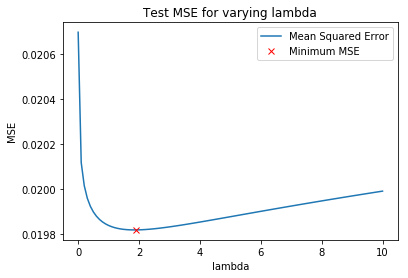

C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Best fit achieved for lamda = 1.7000000000000004 with MSE = 0.019751552471066476


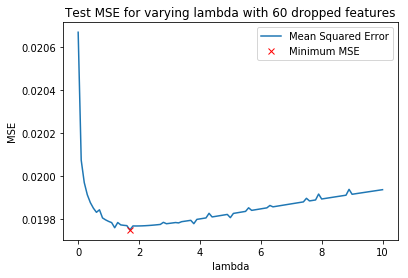

In [75]:
optimize_lambda()
#4.3
optimize_lambda_with_feature_selection(60)